<a href="https://colab.research.google.com/github/SamanMansoor/Deep_Learning/blob/main/Batch_gradient_Descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import matplotlib

In [2]:
path = 'housing.csv'
header_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv(path, names=header_names, delim_whitespace=True)
df.shape

(506, 14)

In [3]:
x = df.loc[:, 'ZN':'LSTAT']
y = df.loc[:, 'PRICE']
x.shape, y.shape

((506, 12), (506,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [5]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=header_names[1:-1], index=X_train.index)
X_test = pd.DataFrame(scalar.transform(X_test), columns=header_names[1:-1], index=X_test.index)


In [6]:
X_train

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
141,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073
272,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430
135,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367
298,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896
122,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596
...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123
192,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990
117,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844
47,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677


In [7]:
X_train['price'] = y_train
X_test['price'] = y_test
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [8]:
X_train

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,price
141,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
272,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
135,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
298,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
122,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123,18.5
192,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990,36.4
117,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844,19.2
47,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677,16.6


# **Error Function**

In [9]:
# Define predicted values and true values
pred = np.random.rand(len(y))  # generate random predictions
true = y

# Define mean squared error function
def mse(pred, true):
#Computes the mean squared error between predicted values and true values.
    mse = np.mean((pred - true) ** 2)
    return mse

# Compute mean squared error of predicted values and true values
mse_result = mse(pred, true)
print("MSE result:", mse_result)

MSE result: 569.2555000287963


# **Dot Product**

In [10]:
data = np.hstack([df.values[::2, :], df.values[1::2, :2]])
target = df.values[1::2, 2]


X, y = data, target

In [11]:
# Define input vector x and weight vector w
x = X[0]   # use the first row of the dataset as input vector
weight = np.random.rand(X.shape[1])  # initialize weight vector with random values

# Define dot product function
def dot_product(x, weight):
    
    #Computes the dot product of two vectors x and w.
    
  
    dot_product = np.dot(x, weight)
    return dot_product

# Compute dot product of x and w
result = dot_product(x, weight)
print("Dot product result:", result)

Dot product result: 591.6049877875122



# **Relu Activation**

In [12]:
def relu(x):
    """Applies ReLU activation to the input x"""
    relu_output = np.maximum(0, x)
    return relu_output
relu(x)

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00, 2.400e+01, 2.731e-02, 0.000e+00])

# **Relu_derivative**

In [13]:
def relu_derivative(x):
    """Calculates the derivative of ReLU activation for the input x"""
    derivative = np.zeros_like(x)
    derivative[x > 0] = 1
    return derivative


relu_derivative(x)


array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

# **Batch_Gradient Descent**

In [37]:
def my_batch(X_train, learning_rate=0.1, n_epochs=225):
    
    # get number of columns in training data
    n_cols = X_train.shape[1]
    
    # get column names
    columns = X_train.columns.values
    
    # initialize weights and bias
    weight = np.random.randn(n_cols - 1)
    Bias = np.random.randn(1)
    
    for epoch in range(n_epochs):
        # Calculate predictions and loss
        pred = relu(np.dot(X_train.iloc[:, :-1].values, weight) + Bias)
        loss = np.mean(np.square(X_train.iloc[:, -1].values - pred))
        
        # calculate gradients
        grad_w = np.mean((-2 * X_train.iloc[:, :-1].values * (X_train.iloc[:, -1].values - pred)[:, np.newaxis]), axis=0)
        grad_b = np.mean(-2 * (X_train.iloc[:, -1].values - pred))
            
        # update weights and bias
        weight = weight - learning_rate * grad_w
        Bias = Bias - learning_rate * grad_b
            
        # print loss for each epoch
        print(f'==========>Epoch: {epoch}/{n_epochs}, loss: {loss:.03f}')
        
    return weight,Bias


weight,Bias=my_batch(X_train)

==========>Epoch: 0/225, loss: 580.808
==========>Epoch: 1/225, loss: 363.957
==========>Epoch: 2/225, loss: 251.394
==========>Epoch: 3/225, loss: 180.278
==========>Epoch: 4/225, loss: 126.579
==========>Epoch: 5/225, loss: 89.931
==========>Epoch: 6/225, loss: 66.019
==========>Epoch: 7/225, loss: 50.537
==========>Epoch: 8/225, loss: 40.504
==========>Epoch: 9/225, loss: 33.913
==========>Epoch: 10/225, loss: 29.637
==========>Epoch: 11/225, loss: 26.872
==========>Epoch: 12/225, loss: 25.056
==========>Epoch: 13/225, loss: 23.864
==========>Epoch: 14/225, loss: 23.075
==========>Epoch: 15/225, loss: 22.546
==========>Epoch: 16/225, loss: 22.185
==========>Epoch: 17/225, loss: 21.933
==========>Epoch: 18/225, loss: 21.751
==========>Epoch: 19/225, loss: 21.617
==========>Epoch: 20/225, loss: 21.513
==========>Epoch: 21/225, loss: 21.425
==========>Epoch: 22/225, loss: 21.346
==========>Epoch: 23/225, loss: 21.279
==========>Epoch: 24/225, loss: 21.220
==========>Epoch: 25/225, loss

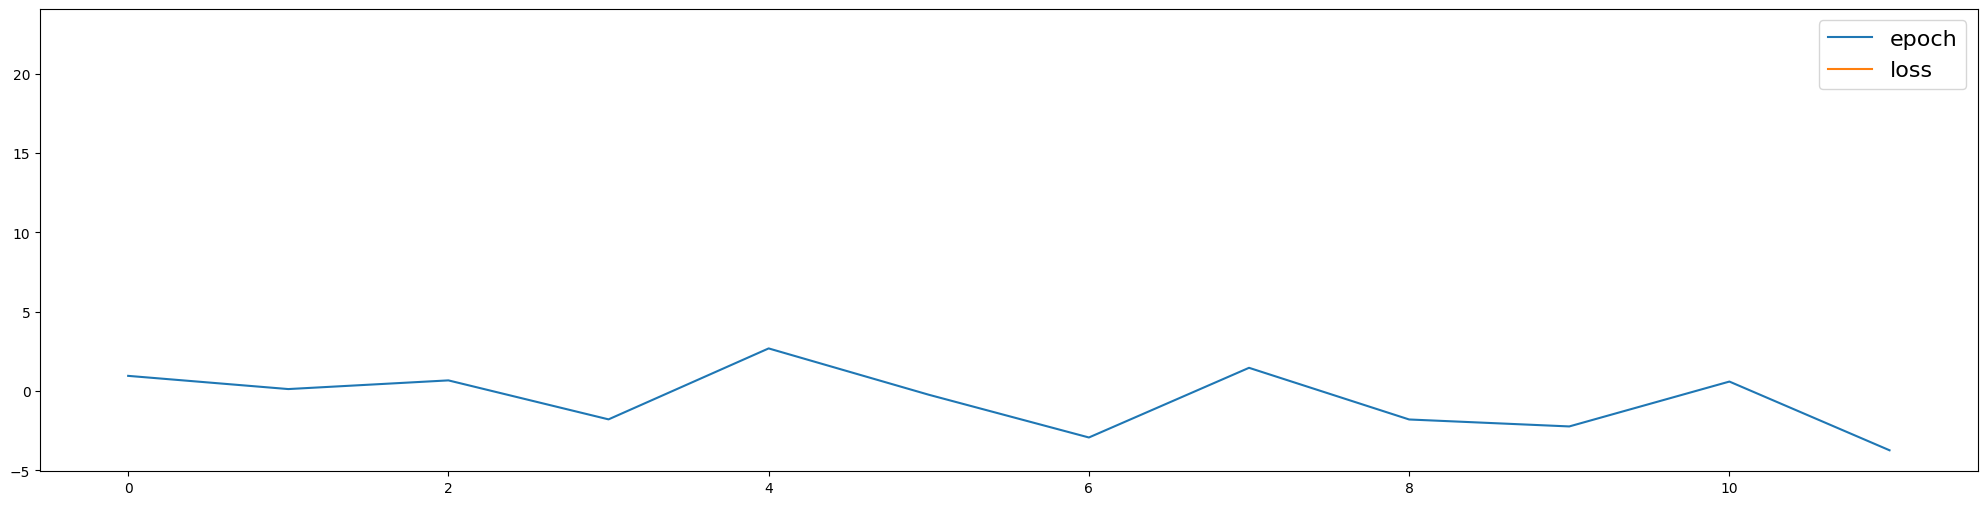

In [38]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
plt.plot(weight, label='epoch')
plt.plot(Bias,   label='loss')
plt.legend(prop={'size': 16})
plt.show()

# **Scatter Plot**

<Axes: xlabel='CRIM', ylabel='PRICE'>

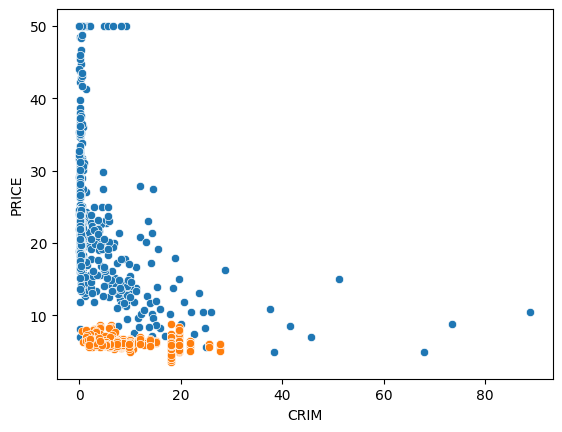

In [41]:
sns.scatterplot(x=df['CRIM'], y=df['PRICE'])
sns.scatterplot(x=df['INDUS'], y=df['RM'])


# **Co-Relation Matrix**

<Axes: >

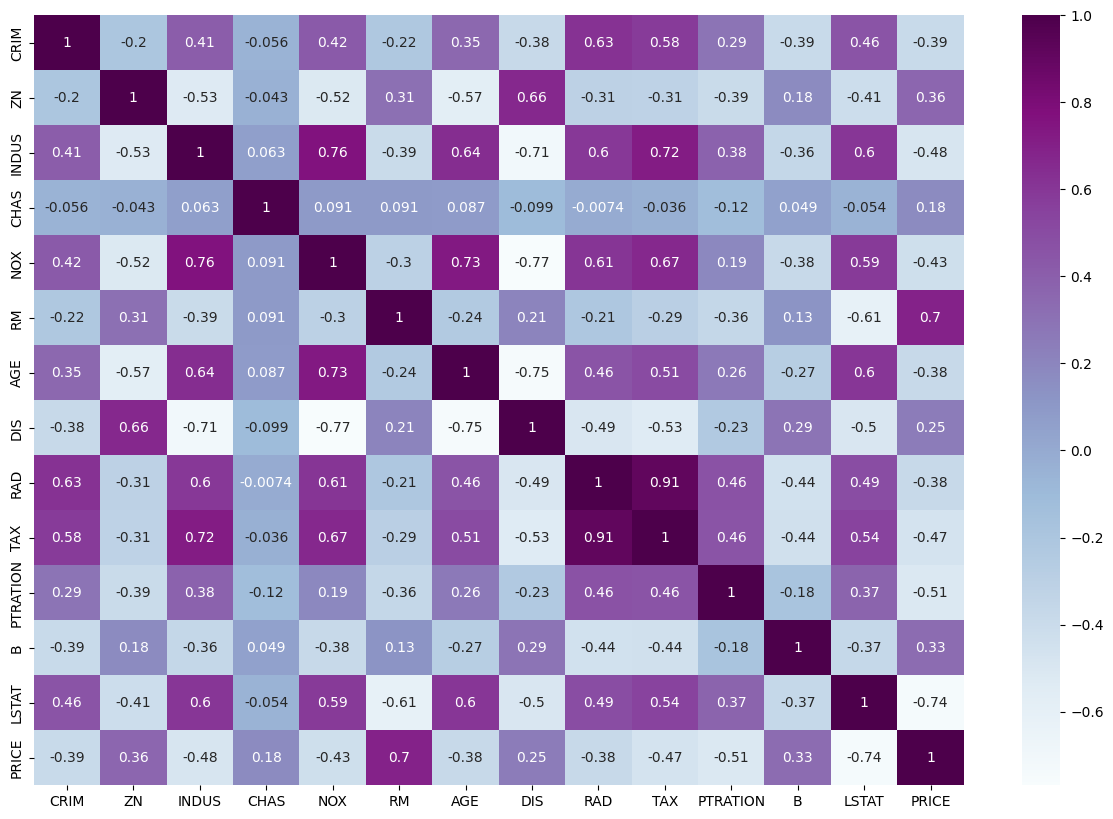

In [18]:
#Coorelation Matrix
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")